# IMPORTS

In [7]:
import graphviz

import pandas as pd
import seaborn as sns

from datetime import datetime

from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier

# LOADING DATA

In [8]:
data = pd.read_csv('https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv')

# DATA FILTERING AND FEATURE ENGINEERING

In [9]:
data['sold'] = data['sold'].apply(lambda x: 1 if x == 'yes' else 0)

In [10]:
today = datetime.today().year
data['car_age'] = today - data['model_year']

In [11]:
data['km_per_year'] = data['mileage_per_year'] * 1.60934

In [12]:
data = data.drop(columns=['Unnamed: 0', 'model_year', 'mileage_per_year'], axis=1)

In [13]:
x = data[['price', 'car_age', 'km_per_year']]
y = data['sold']

# Modelling

## Support Vector Machine ( Linear SVC )

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y)

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

model = LinearSVC()
model.fit(x_train, y_train)
previsoes = model.predict(x_test)
acuracia = accuracy_score(y_test, previsoes) * 100
acuracia

/home/alex/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


71.12

## Decision Tree

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y)

model = DecisionTreeClassifier(max_depth=4)
model.fit(x_train, y_train)
previsoes = model.predict(x_test)
acuracia = accuracy_score(y_test, previsoes) * 100
acuracia

78.24

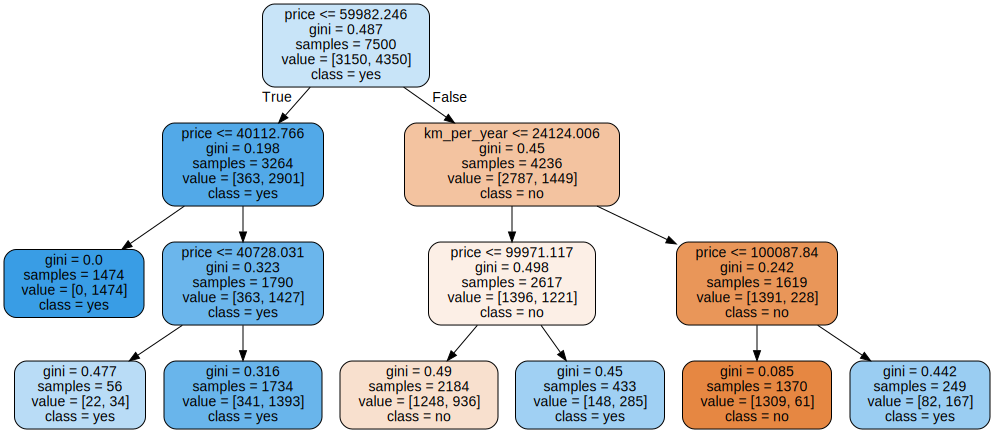

In [27]:
features = x.columns
dot_data = export_graphviz(model, out_file=None, filled=True, rounded=True, feature_names = features, class_names = ['no', 'yes'])
grafico = graphviz.Source(dot_data)
grafico